In [1]:
# Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler # for scaling
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for evaluation

In [15]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [17]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)    
df['Target'] = data.target                                  
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

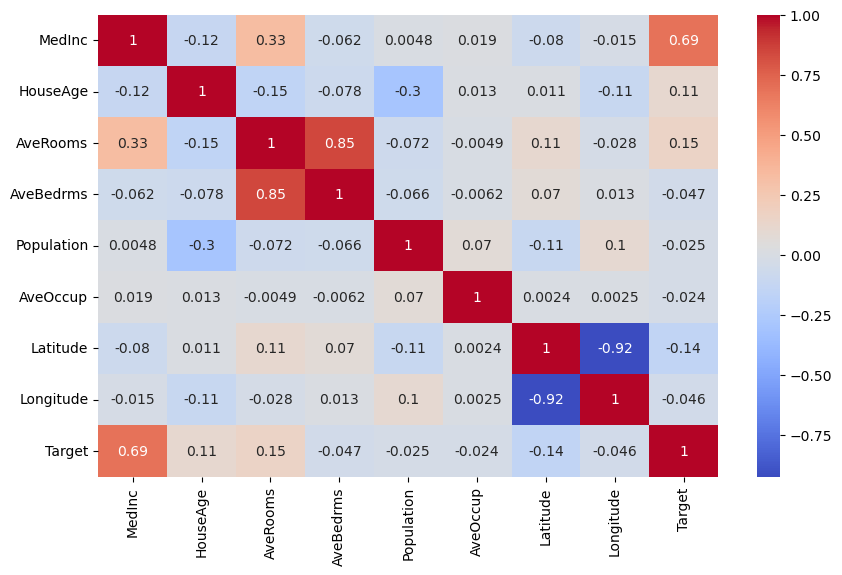

In [23]:
#CORRELATION FOR FEATURE SELECTION
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [25]:
#selecting with strong correlation
X = df[['MedInc', 'AveRooms', 'HouseAge']]
y = df['Target']  

In [27]:
#splitting for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
#scaling
from sklearn.preprocessing import StandardScaler
featurescaler = StandardScaler()
X_train_scaled =featurescaler.fit_transform(X_train)   
X_test_scaled = featurescaler.transform(X_test)      

In [33]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# visualization

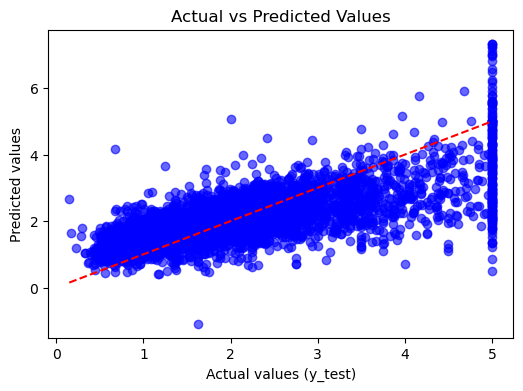

In [37]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual values (y_test)')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.show()

#  EVALUATION METRICS

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
RSquared = r2_score(y_test, y_pred)

print("Linear Regression Evaluation:")
print(f"Mean Squared Error (MSE): {MSE:.4f}")
print(f"Mean Absolute Error (MAE): {MAE:.4f}")
print(f"R squared Score (R^2): {RSquared :.4f}")

Linear Regression Evaluation:
Mean Squared Error (MSE): 0.6589
Mean Absolute Error (MAE): 0.6033
R squared Score (R^2): 0.4972


# DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor(random_state=42)
DT_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
y_pred_DT = DT_model.predict(X_test_scaled)

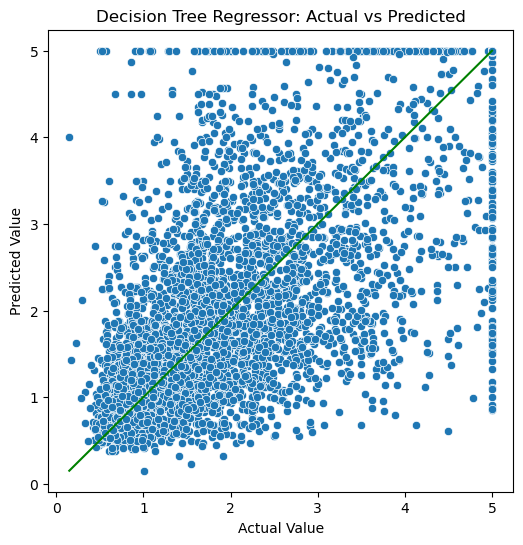

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_DT)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='GREEN')  
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Decision Tree Regressor: Actual vs Predicted")
plt.show()

In [51]:
MSC_DT = mean_squared_error(y_test, y_pred_DT)
MAE_DT = mean_absolute_error(y_test, y_pred_DT)
R2_DT = r2_score(y_test, y_pred_DT)

print("Decision Tree Regressor Evaluation:")
print("Mean Squared Error (MSE):", round(MSC_DT, 4))
print("Mean Absolute Error (MAE):", round(MAE_DT, 4))
print("R squared Score (R^2):", round(R2_DT, 4))

Decision Tree Regressor Evaluation:
Mean Squared Error (MSE): 1.1061
Mean Absolute Error (MAE): 0.7538
R squared Score (R^2): 0.1559


# RANDOM FOREST REGRESSOR

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train_scaled, y_train)

y_pred_RF = RF_model.predict(X_test_scaled)

MSE_RF = mean_squared_error(y_test, y_pred_RF)
MAE_RF = mean_absolute_error(y_test, y_pred_RF)
RSquare_RF = r2_score(y_test,y_pred_RF)

print("Random Forest Regressor Evaluation:")
print("Mean Squared Error (MSE):", round(MSE_RF, 4))
print("Mean Absolute Error (MAE):", round(MAE_RF, 4))
print("R-squared Score (R²):", round(RSquare_RF, 4))

Random Forest Regressor Evaluation:
Mean Squared Error (MSE): 0.5977
Mean Absolute Error (MAE): 0.5606
R-squared Score (R²): 0.5439


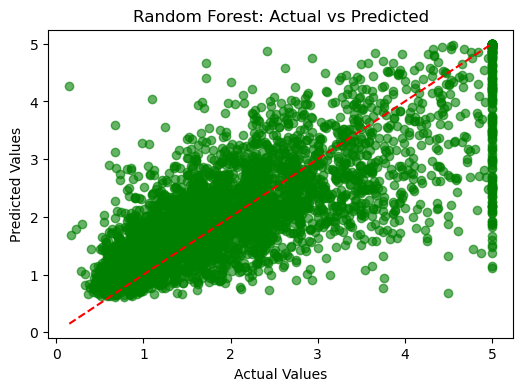

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_RF, alpha=0.6, color='GREEN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

# GARDIENT BOOSTER

In [68]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

GBR_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GBR_model.fit(X_train_scaled, y_train)

y_pred_GBR = GBR_model.predict(X_test_scaled)

MSE_GBR = mean_squared_error(y_test, y_pred_GBR)
MAE_GBR = mean_absolute_error(y_test, y_pred_GBR)
RSquare_GBR = r2_score(y_test, y_pred_GBR)

print("Gradient Boosting Regressor Evaluation:")
print("Mean Squared Error (MSE):", round(MSE_GBR, 4))
print("Mean Absolute Error (MAE):", round(MAE_GBR, 4))
print("R-squared Score (R²):", round(RSquare_GBR, 4))

Gradient Boosting Regressor Evaluation:
Mean Squared Error (MSE): 0.5538
Mean Absolute Error (MAE): 0.5347
R-squared Score (R²): 0.5774


C:\Users\HP\AppData\Local\Temp\ipykernel_11540\4173282310.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')  # Perfect prediction line


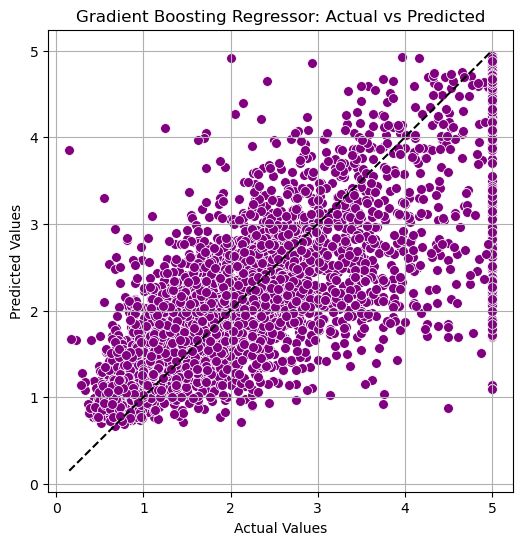

In [70]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_GBR , color='PURPLE', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor: Actual vs Predicted")
plt.grid(True)
plt.show()

# SUPPORT VECTOR REGRESSOR

In [81]:
from sklearn.svm import SVR

SVR_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
SVR_model.fit(X_train_scaled, y_train)

y_pred_SVR = SVR_model.predict(X_test_scaled)

MSE_SVR = mean_squared_error(y_test, y_pred_SVR)
MAE_SVR = mean_absolute_error(y_test,y_pred_SVR)
RSquare_SVR = r2_score(y_test, y_pred_SVR)

print("Support Vector Regressor (SVR) Evaluation:")
print("Mean Squared Error (MSE):", round(MSE_SVR, 4))
print("Mean Absolute Error (MAE):", round(MAE_SVR, 4))
print("R-squared Score (R²):", round(RSquare_SVR, 4))

Support Vector Regressor (SVR) Evaluation:
Mean Squared Error (MSE): 0.5705
Mean Absolute Error (MAE): 0.5207
R-squared Score (R²): 0.5647


C:\Users\HP\AppData\Local\Temp\ipykernel_11540\3897193563.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')


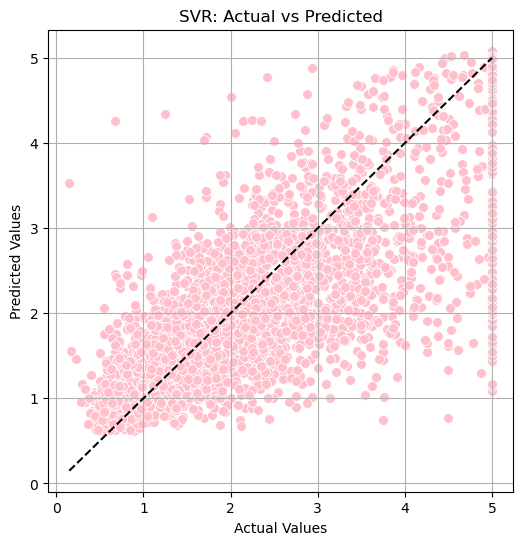

In [83]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_SVR, color='PINK', s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', color='black')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted")
plt.grid(True)
plt.show()

# MODEL COMPARISON

In [88]:
print("\nModel Comparison (R² Scores):")
print("Linear Regression:", round(RSquared, 4))
print("decision tree:", round(R2_DT, 4))
print("Random Forest:", round(RSquare_RF, 4))
print("Gradient Boosting:", round(RSquare_GBR, 4))
print("SVR:", round(RSquare_SVR, 4))


Model Comparison (R² Scores):
Linear Regression: 0.4972
decision tree: 0.1559
Random Forest: 0.5439
Gradient Boosting: 0.5774
SVR: 0.5647


In [ ]:
#Based on (coeffient of determaiantion ) and other mertics evaluation scores, Gradient Boosting is the best model for machine training and prediction,then next place goes to SVR ,then Random forest.The worst model is decision tree. so to deal with this complex and non liner data set Gradient Boosting,SVR,Random Forest are best choices with low metrics values(MSE,MAE) ans best R squared score(close to 1).